In [3]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [19]:
dir_images = r'/home/geeran/Documents/apple/images'
dir_images
natsort.natsorted(os.listdir(dir_images))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [20]:
train=pd.read_csv(r'/home/geeran/Documents/apple/label/train.csv')
test=pd.read_csv(r'/home/geeran/Documents/apple/label/test.csv')

In [30]:
images=Image.open(r'/home/geeran/Documents/apple/images/Test_0.jpg')

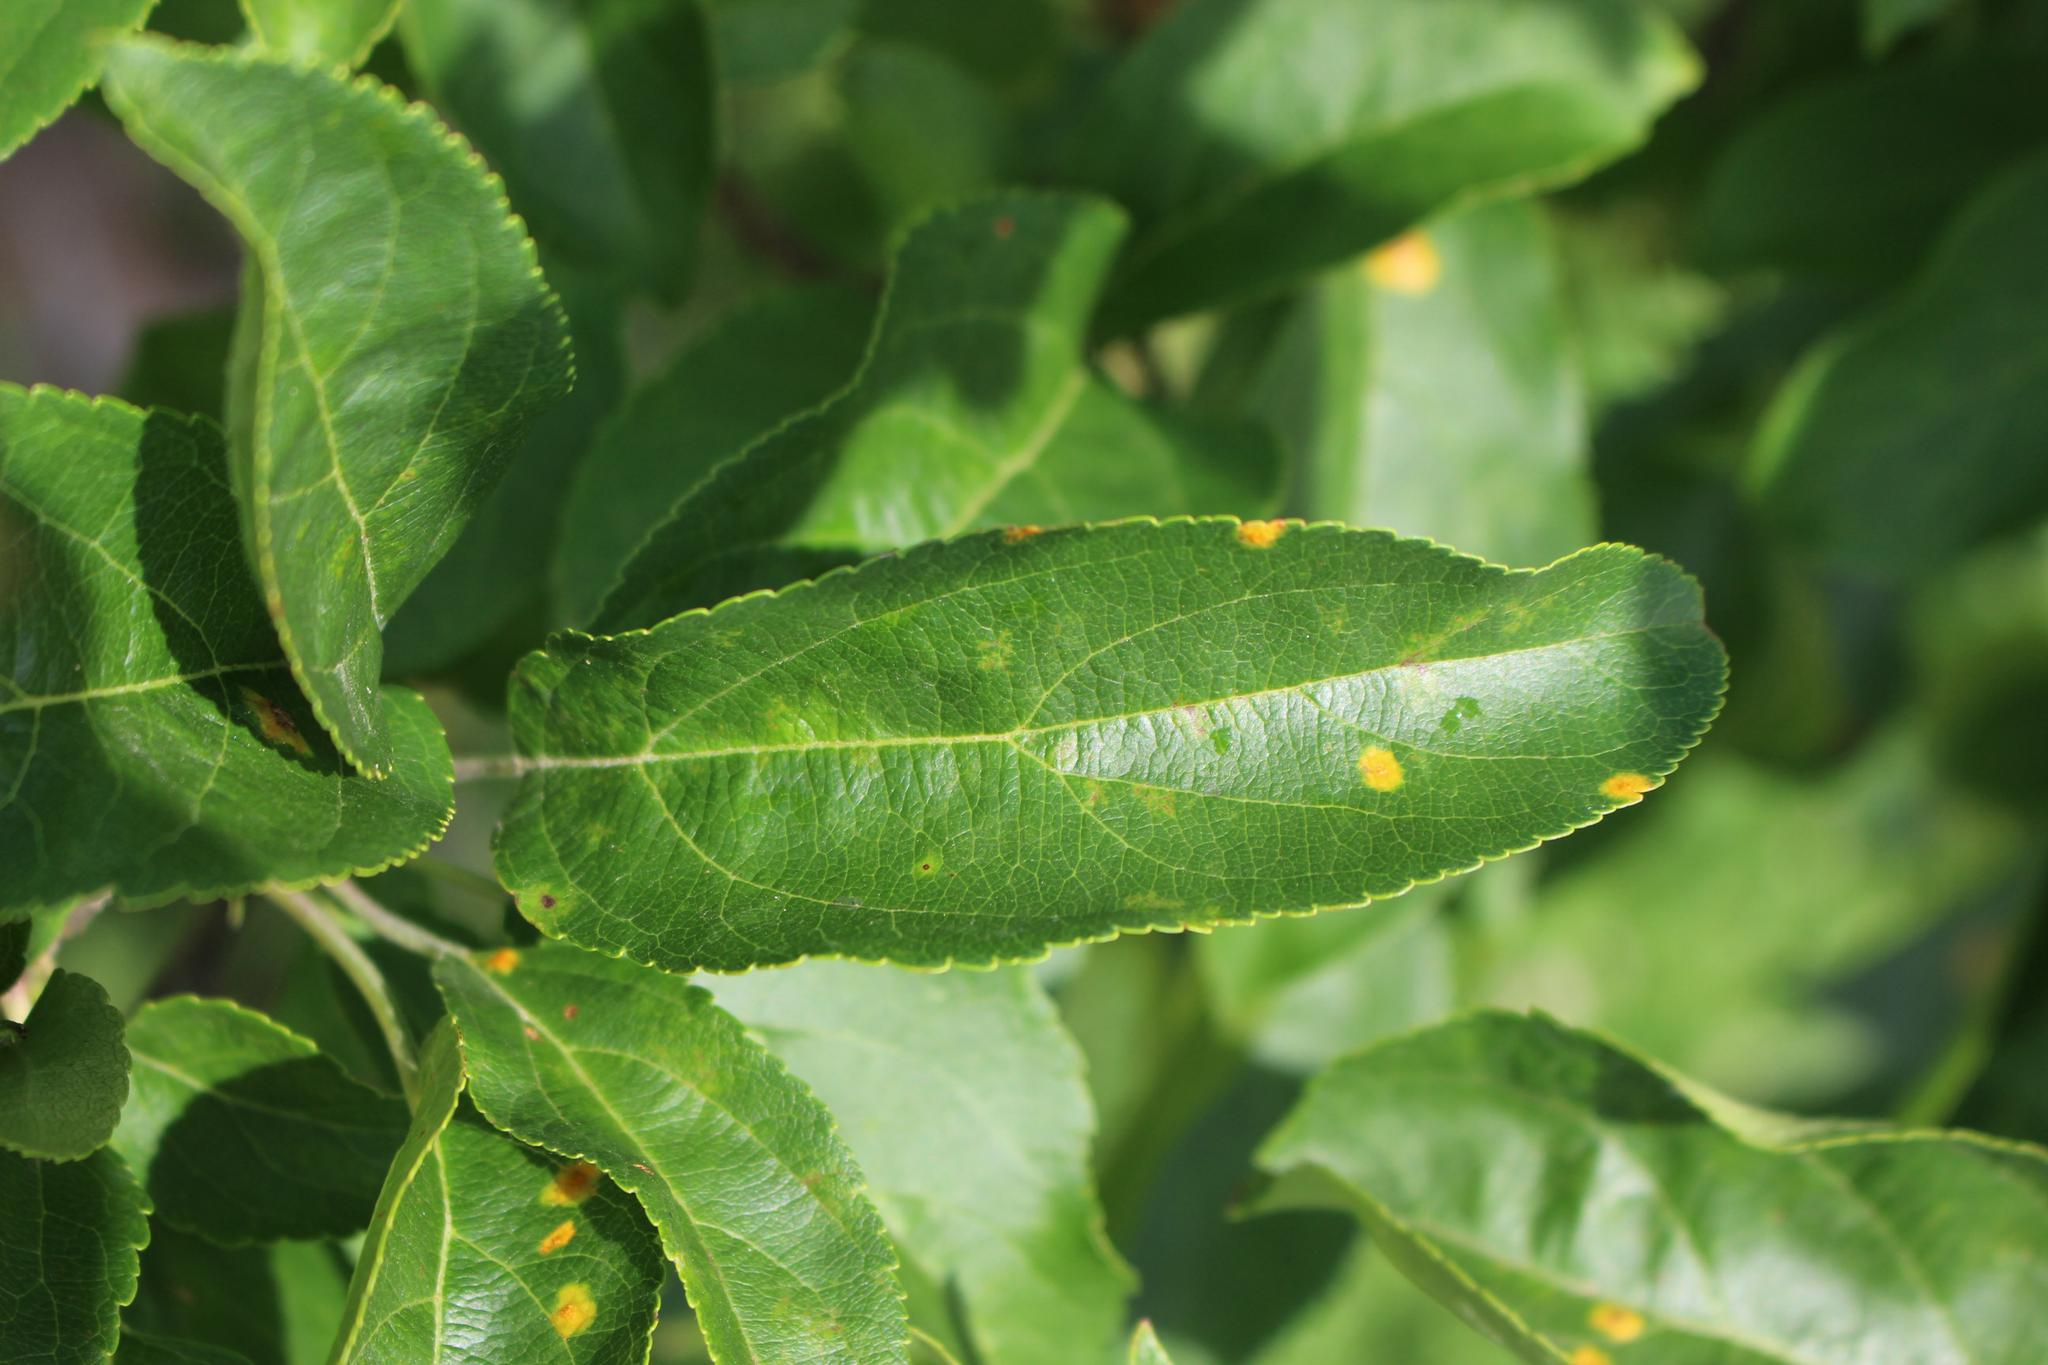

In [31]:
image

In [32]:
#Creating y hat
col_names=train.loc[:,'healthy':].columns
print(col_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab', 'label'], dtype='object')


In [33]:
number=0
train['label']=0
for i in col_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [34]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,15
1,Train_1,0,1,0,0,5
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,10
4,Train_4,1,0,0,0,0


In [35]:
def get_img_of_label(img):
    #extracting label
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label


In [36]:
#data processing the according to catogary 
#fun to do the job
#thought to sort will be good
def create_td():
    
    for image in tqdm(images):
        label=get_img_of_label(image)
        path=os.path.join(dir_image,image)
        
        if search("Train",image):
            #sorting the train data set as per label eg if label = 0 the img is in healthy folder
            if (image.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/home/geeran/Videos/Plant pathology/train/healthy')
            
            elif(image.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/home/geeran/Videos/Plant pathology/train/multiple_diseases')
                
            elif(image.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/home/geeran/Videos/Plant pathology/train/rust')
                
            elif(image.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/home/geeran/Videos/Plant pathology/train/scab')
                
        elif search("Test",image):
            shutil.copy(path,r'/home/geeran/Videos/Plant pathology/test')
                

In [37]:
shutil.os.mkdir(r'/home/geeran/Videos/Plant pathology/train')

shutil.os.mkdir(r'/home/geeran/Documents/apple/train/healthy')
shutil.os.mkdir(r'/home/geeran/Documents/apple/train/multiple_diseases')
shutil.os.mkdir(r'/home/geeran/Documents/apple/train/train/rust')
shutil.os.mkdir(r'/home/geeran/Documents/apple/train/train/scab')

shutil.os.mkdir(r'/home/geeran/Documents/apple/test')       

FileNotFoundError: [Errno 2] No such file or directory: '/home/geeran/Videos/Plant pathology/train'

In [38]:
train_DIR=create_td()

0it [00:00, ?it/s]


TypeError: 'JpegImageFile' object is not iterable

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [ ]:
#creating the data as per size
#spliting train data set 20%
#spliting test
data_set=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)

train_data=data_set.flow_from_directory(r'/home/geeran/Videos/Plant pathology/train',
                                         target_size=(228,228),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')


val_data= data_set.flow_from_directory(r'/home/geeran/Videos/Plant pathology/train',
                                         target_size=(228,228),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

In [ ]:
#feed fowardNN
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(228,228,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()
          
          

In [ ]:
#saving only best
#For when accuracy not increasing then training will stop
checker=ModelCheckpoint(r'/home/geeran/Videos/Plant pathology/apple.h5',
                          monitor='val_loss',
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checker,earlystop]

In [ ]:

model_runned=model.fit_generator(train_data, validation_data=val_data,
                                  epochs=30,
                                  steps_per_epoch=train_data.samples//16,
                                  validation_steps=val_data.samples//16,
                                  callbacks=callbacks)

In [ ]:
acc_train=model_runned.history['accuracy']
acc_val=model_runned.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
loss_train=model_runned.history['loss']
loss_val=model_runned.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#testing
test_image=r'/home/geeran/Videos/Plant pathology/train/rust/Train_3.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(228,228))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [ ]:
#accurace=0.9327